### Lab Task 1 - Dataset Preparation, Feature Scaling

In [2]:
# import sklearn.datasets
import pandas as pd
import numpy as np

In [3]:
data = sklearn.datasets.fetch_california_housing()
print(data)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [16]:
data['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [17]:
data['target_names']

['MedHouseVal']

In [20]:
new_data={}
new_data['data']=data['data'][:,[0,1,2]]
new_data['feature_names']=data['feature_names'][:3]
new_data['feature_names']

['MedInc', 'HouseAge', 'AveRooms']

In [22]:
new_data['target']=data['target']
new_data['target_names']=data['target_names']
new_data['target_names']

['MedHouseVal']

In [29]:
# Splitting dataset randomly
data['data'].shape

(20640, 8)

In [37]:

# create and shuffle a list of indices
idx_list=[i for i in range(len(new_data['data']))]
shuffled_idx_list=np.random.permutation(np.array(idx_list))

# split the indices list into train and val indices
_80thidx=(0.8*len(new_data['data']))
train_indices_list=shuffled_idx_list[:int(_80thidx)]
val_indices_list=shuffled_idx_list[int(_80thidx):]

print(len(train_indices_list)+len(val_indices_list))

[0, 1, 2, 3, 4]
[18872  2691  8354 20278  4355]


In [50]:
# splitting  train data
train_data={}
train_data['data']=new_data['data'][train_indices_list]
train_data['target']=new_data['target'][train_indices_list]
train_data['feature_names']=new_data['feature_names']
train_data['target_names']=new_data['target_names']
train_data['data'].shape

In [62]:
# splitting val data
val_data={}
val_data['data']=new_data['data'][val_indices_list]
val_data['target']=new_data['target'][val_indices_list]
val_data['feature_names']=new_data['feature_names']
val_data['target_names']=new_data['target_names']
val_data['data'].shape

(4128, 3)

In [ ]:
# converting to a Dataframe and then to csv
# feature scaling is done in task 4 
# train data
train_df=pd.DataFrame(train_data['data'],columns=train_data['feature_names'])
train_df['target']=train_data['target']
print(train_df[:3])


val_df=pd.DataFrame(val_data['data'],columns=val_data['feature_names'])
val_df['target']=val_data['target']
print(val_df[:3])


train_df.to_csv('train_data.csv',index=False)
val_df.to_csv('val_data.csv',index=False)

print("data saved in train_data.csv and val_data.csv")

   MedInc  HouseAge  AveRooms  target
0  5.2957      18.0  6.483932   1.719
1  1.9911      10.0  5.575668   0.675
2  5.0912      44.0  6.457576   1.698


### Lab Task 2 - Cost Function without and with Regularization

In [ ]:
# fix shapes
def fix_shapes_and_get_initial_Weights(X,y):
    """
    Fixes the shapes of the feature and weight vectors.
    - Ensures y is a column vector of shape (m,1).
    - Adds a bias term (column of ones) to X, making its shape (m, n+1).
    - Initializes weights w randomly with shape (n+1, 1) to match the extended feature matrix.
    """
    # add bias to features (a column of ones) and weights
    m=X.shape[0]
    n=X.shape[1]
    y=y.reshape(-1,1) 

    np.random.seed(42)
    w=np.random.rand(n+1,1)
    X=np.c_[np.ones((m,1)),X]

    return X,y,w

# load train data

def load_data_and_weights(path):
    train_df=pd.read_csv(path)

    # load features and convert to numpy
    train_features=train_df.iloc[:,:-1]
    X=train_features.to_numpy()

    # load labels and convert to numpy
    train_labels=train_df.iloc[:,-1]
    y=train_labels.to_numpy()

    X,y,w=fix_shapes_and_get_initial_Weights(X,y)

    return X,y,w


def cost_function(X,y,w,lambd=0):
    m=X.shape[0]
    # find hypothesis
    y_pred=X@w
    #find cost
    MSE=np.sum(np.square(y_pred-y))/(2*m) 
    reg_term=(lambd/(2*m) *np.sum(np.square(w[1:])))
    cost=MSE+reg_term
    # print(f"features shape: {X.shape}")
    # print(f"weights shape: {w.shape}")
    # print(f"hypothesis shape: {y_pred.shape}")
    # print(f"target shape: {y.shape}")
    # print(f"top 5 predictions: {y_pred[:5]}")
    # print(f"top 5 labels: {y[:5]}")
    # print(f"cost: {cost}")

    return cost

### Lab Task 3 –Gradient Descent without and with Regularization

In [182]:
def compute_gradient(X,y,w,lambd):
    """
    Args:
        X - (m,n)
        y - (m,1)
        w - (n,1)
    
    Returns:
        dw - (n,1) - gradient with respect to each feature
    
    """
    m=X.shape[0] # number of examples

    y_pred=X@w # (m,n)@(n,1)== (m,1)
    error=y_pred-y # (m,1)
    grad=(1/m)*(X.T@error) # (n,1)
    reg_term=(lambd/m)*np.copy(w) #(n,1)
    reg_term[0]=0
    dw=grad+reg_term

    # exlude reg term from bias term



    return dw 


def gradient_descent(X,y,w,alpha,lambd,iters=100):

    for i in range(iters):
        dw=compute_gradient(X,y,w,lambd)
        w-=(alpha*dw)
        
        if i%10==0:
            print(f"Iteration {i}: Cost = {cost_function(X, y, w, lambd)}")
    return w
    


In [ ]:
X,y,w=load_data_and_weights("train_data.csv")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"w shape: {w.shape}")
w=gradient_descent(X,y,w,0.0,0)

X shape: (16512, 4)
y shape: (16512, 1)
w shape: (4, 1)
Initial cost: 381.9013601230002
Iteration 0: Cost = 381.9013601230002
Iteration 10: Cost = 381.9013601230002
Iteration 20: Cost = 381.9013601230002
Iteration 30: Cost = 381.9013601230002
Iteration 40: Cost = 381.9013601230002
Iteration 50: Cost = 381.9013601230002
Iteration 60: Cost = 381.9013601230002
Iteration 70: Cost = 381.9013601230002
Iteration 80: Cost = 381.9013601230002
Iteration 90: Cost = 381.9013601230002


### Task 4: Training and Validation Program

Epoch 0: Training Loss = 2.6004754261808003, Validation Loss = 2.6636302807096537
Epoch 10: Training Loss = 2.2088033392355078, Validation Loss = 2.253807031496124
Epoch 20: Training Loss = 1.8861196873824018, Validation Loss = 1.9161279383051257
Epoch 30: Training Loss = 1.6200657725432517, Validation Loss = 1.6376968710568671
Epoch 40: Training Loss = 1.4005296800319778, Validation Loss = 1.4079571961185122
Epoch 50: Training Loss = 1.2192321657505725, Validation Loss = 1.2182611611387788
Epoch 60: Training Loss = 1.0693899386627126, Validation Loss = 1.0615197378405807
Epoch 70: Training Loss = 0.945441654422615, Validation Loss = 0.9319176429086179
Epoch 80: Training Loss = 0.8428247697803449, Validation Loss = 0.8246812124309512
Epoch 90: Training Loss = 0.7577936835410106, Validation Loss = 0.7358891771175281

Final model parameters:
Weights: [1.37241083 0.45114903 0.17516004 0.3765991 ]


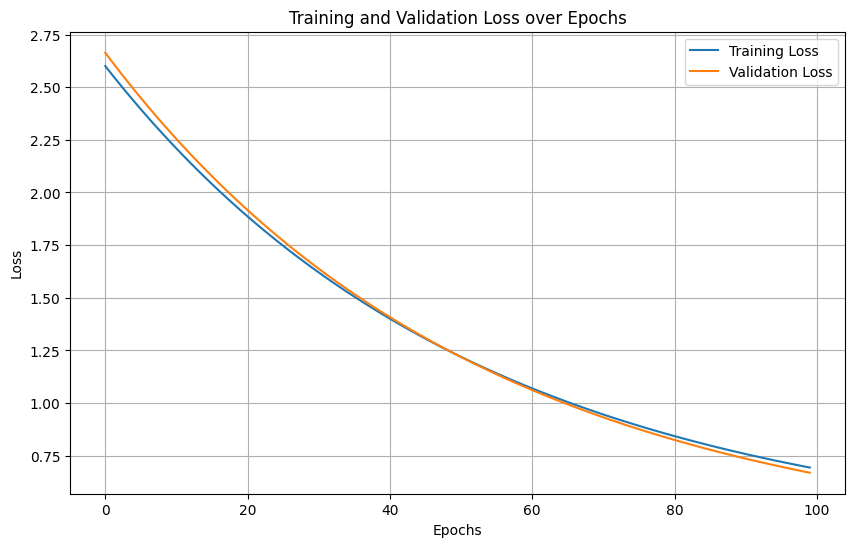

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def main():
    # Load training data
    X_train, y_train, w_initial = load_data_and_weights("train_data.csv")
    
    # Load validation data
    X_val, y_val, _ = load_data_and_weights("val_data.csv")  # We don't need the w_initial for validation
    
    # Normalize features for both training and validation data
    X_train_norm, means, stds = normalize_features(X_train)
    
    # Apply same normalization to validation data
    X_val_norm = X_val.copy()
    X_val_norm[:, 1:] = (X_val[:, 1:] - means) / stds
    
    # Initialize normalized weights
    w = np.random.rand(X_train_norm.shape[1], 1)
    
    # Set hyperparameters
    alpha = 0.01        
    lambd = 0.1         
    num_epochs = 100    
    
    # Initialize arrays to store losses
    train_losses = []
    val_losses = []
    
    # Training loop
    for epoch in range(num_epochs):
        # Update weights using gradient descent (one epoch)
        dw = compute_gradient(X_train_norm, y_train, w, lambd)
        w = w - (alpha * dw)
        
        # Calculate losses
        train_loss = cost_function(X_train_norm, y_train, w, lambd)
        val_loss = cost_function(X_val_norm, y_val, w, lambd)
        
        # Store losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Training Loss = {train_loss}, Validation Loss = {val_loss}")
    
    # Final model parameters
    print("\nFinal model parameters:")
    print(f"Weights: {w.flatten()}")
    
    # Plot losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_epochs), train_losses, label='Training Loss')
    plt.plot(range(num_epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.savefig('loss_plot.png')
    plt.show()
    
    return w, train_losses, val_losses

def normalize_features(X):
    # Skip the bias column (first column)
    X_norm = X.copy()
    means = np.mean(X[:, 1:], axis=0)
    stds = np.std(X[:, 1:], axis=0)
    
    # Avoid division by zero
    stds[stds == 0] = 1
    
    # Normalize each feature
    X_norm[:, 1:] = (X[:, 1:] - means) / stds
    
    return X_norm, means, stds

# Run the main function
if __name__ == "__main__":
    w_final, train_losses, val_losses = main()

### Task 5: Tuning Alpha and Lambda

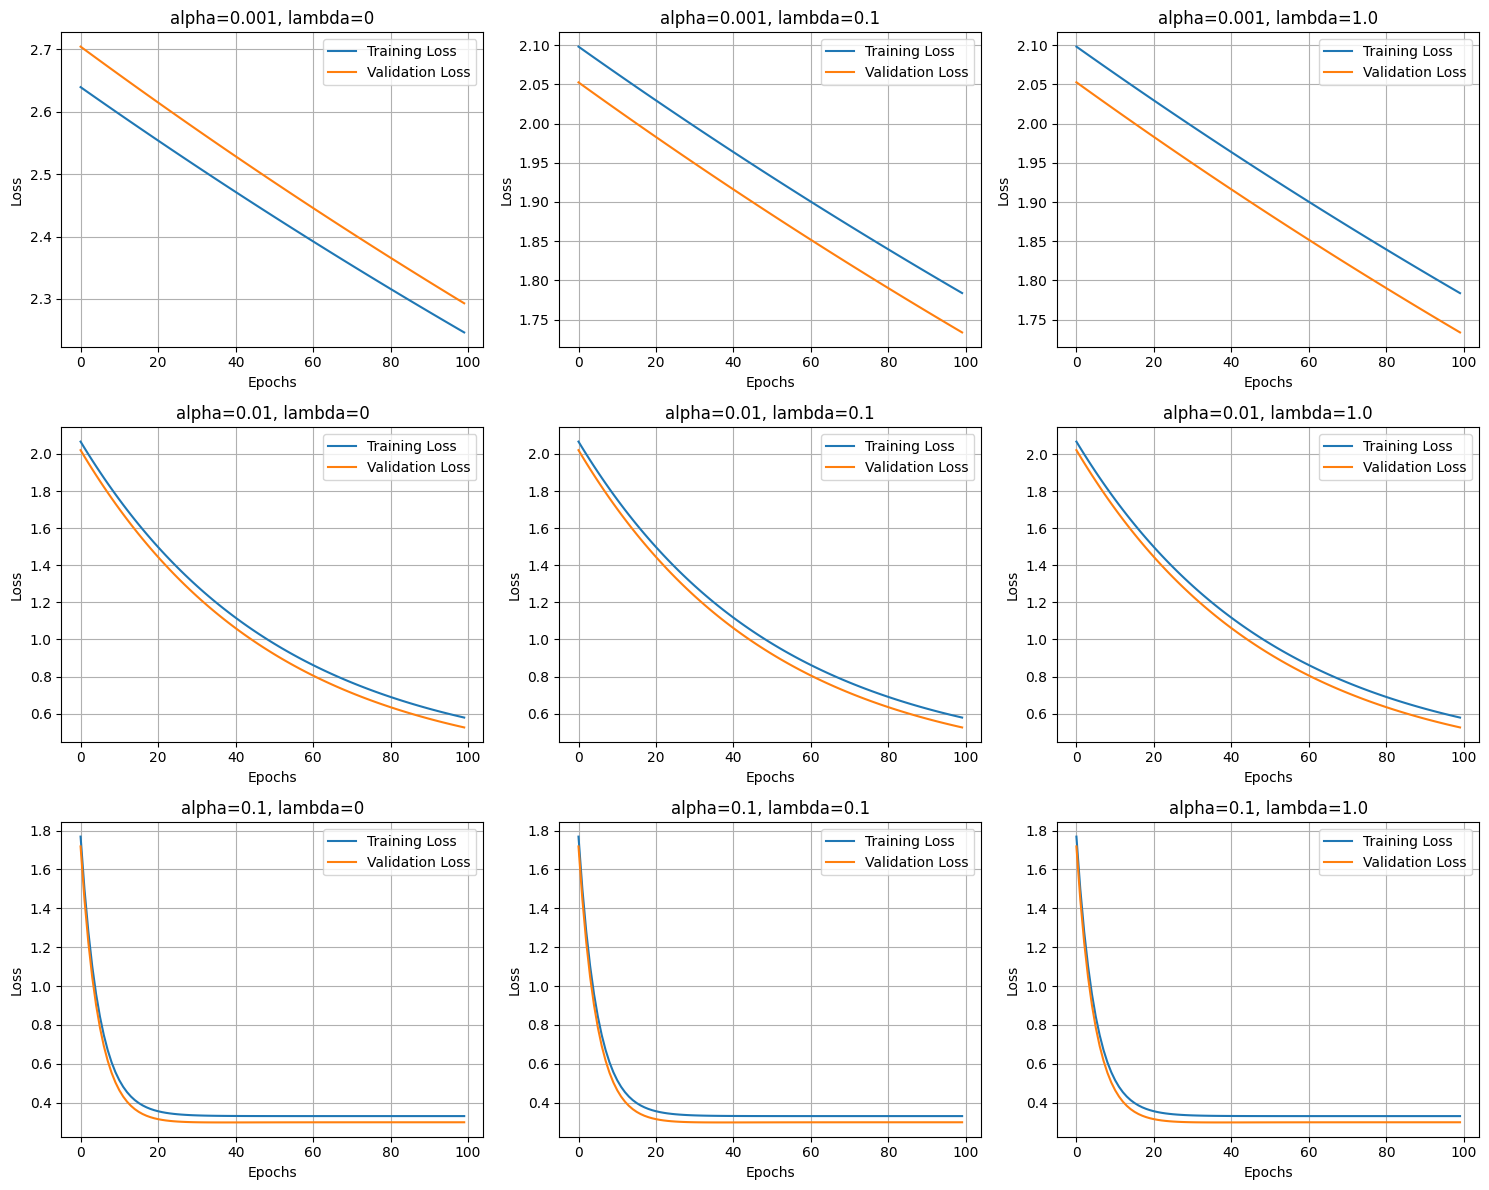

In [207]:


def tune_hyperparameters():
    # Load and prepare data
    X_train, y_train, _ = load_data_and_weights("train_data.csv")
    X_val, y_val, _ = load_data_and_weights("val_data.csv")
    
    # Normalize features
    X_train_norm, means, stds = normalize_features(X_train)
    X_val_norm = X_val.copy()
    X_val_norm[:, 1:] = (X_val[:, 1:] - means) / stds
    
    # Define hyperparameter values to test
    alphas = [0.001, 0.01, 0.1]
    lambdas = [0, 0.1, 1.0]
    num_epochs = 100
    
    # Create subplots for each alpha-lambda combination
    fig, axs = plt.subplots(len(alphas), len(lambdas), figsize=(15, 12))
    
    # Loop through combinations
    for i, alpha in enumerate(alphas):
        for j, lambd in enumerate(lambdas):
            # Reset weights for each run
            w = np.random.rand(X_train_norm.shape[1], 1)
            np.random.seed(42)  # For reproducibility
            
            # Initialize arrays to store losses
            train_losses = []
            val_losses = []
            
            # Training loop
            for epoch in range(num_epochs):
                # Update weights using gradient descent (one epoch)
                dw = compute_gradient(X_train_norm, y_train, w, lambd)
                w = w - (alpha * dw)
                
                # Calculate losses
                train_loss = cost_function(X_train_norm, y_train, w, lambd)
                val_loss = cost_function(X_val_norm, y_val, w, lambd)
                
                # Store losses
                train_losses.append(train_loss)
                val_losses.append(val_loss)
            
            # Plot losses for this combination
            ax = axs[i, j]
            ax.plot(range(num_epochs), train_losses, label='Training Loss')
            ax.plot(range(num_epochs), val_losses, label='Validation Loss')
            ax.set_title(f'alpha={alpha}, lambda={lambd}')
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Loss')
            ax.legend()
            ax.grid(True)
    
    plt.tight_layout()
    plt.savefig('hyperparameter_tuning_plots.png')
    plt.show()
    
    # Also generate individual plots for better visibility
    for i, alpha in enumerate(alphas):
        for j, lambd in enumerate(lambdas):
            # Reset weights for each run
            w = np.random.rand(X_train_norm.shape[1], 1)
            np.random.seed(42)  # For reproducibility
            
            # Initialize arrays to store losses
            train_losses = []
            val_losses = []
            
            # Training loop
            for epoch in range(num_epochs):
                # Update weights using gradient descent (one epoch)
                dw = compute_gradient(X_train_norm, y_train, w, lambd)
                w = w - (alpha * dw)
                
                # Calculate losses
                train_loss = cost_function(X_train_norm, y_train, w, lambd)
                val_loss = cost_function(X_val_norm, y_val, w, lambd)
                
                # Store losses
                train_losses.append(train_loss)
                val_losses.append(val_loss)
            
            # Create individual plot
            plt.figure(figsize=(10, 6))
            plt.plot(range(num_epochs), train_losses, label='Training Loss')
            plt.plot(range(num_epochs), val_losses, label='Validation Loss')
            plt.title(f'Learning Curves with alpha={alpha}, lambda={lambd}')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.savefig(f'learning_curve_alpha_{alpha}_lambda_{lambd}.png')
            plt.close()

# Run the hyperparameter tuning
if __name__ == "__main__":
    tune_hyperparameters()